#Neural Networks with Keras
**Steven L. Shafer, MD**

*Professor Emeritus, Stanford University*

-----

Welcome to the Deep Learning with Keras Workshop at the WFSA Congress.

This demonstration will be run in **Python**, not in the R programming language.

The reason is that the Google Colab Notebooks already have Python installed. That will allow us to use the 90 minutes to focus on the basic concepts of a neural network, rather than spending the entire workshop installing the necessary software on your laptops.

The workshop will **not** attempt to teach the Python programming language.


#Basic terms

**Neural Network** refers to simple cells of data that communicate with tens, hundreds, thousands, or even millions of other cells of data, analogous to how nerves communicate with tens, hundreds, thousands, or even millions of other nerves.

**Tensors** are collections of these cells. The word **tensor** describes these collections. You already know several kinds of tensors:
* **Scalar**: a single number, such as 7. This is a *tensor* of 0 dimensions.
* **Vector**: a list of numbers, such as 1,2,3,4,5,6,7. This is a *tensor* of 1 dimension.
* **Array**: a two dimensional list, such as an 10 row by 10 column Excel spreadsheet. This is a *tensor* of 2 dimensions.
* **Cube**: A three dimensional list, for example ten Excel spreadsheets, each 10 rows and 10 columns. This is a *tensor* of 3 dimensions.
* **Hypercube**: A bunch of cubes. This is a *tensor* of 4 dimensions.

Our language doesn't have word for tensors of more than 4 dimensions. After 4 dimensions, we just call them *tensors*

#Tensors in Neural Networks

As mentioend above, **tensors** are collections of the individual cells that are used in neural networks. We will be building a neural image that recognizes an image. Each image is 28 pixels by 28 pixels. That is a 2 dimensional **tensor**.

Our data set consists of 70,000 such images. Thus, our data set is a three dimensional **tensor**, with dimensions of 28 x 28 x 70,000. 60,000 images will be used for training, and 10,000 images will be used to test the model.



We will create new **tensors** that connect all of these cells. These **tensors** will build on each other, creating more and more connections.

However, our final **tensor**, the result, will just be a vector of 10 digits: 0,1,2,3,5,6,7,8,9. That will be a tensor of 1 dimension.

# TensorFlow
You can think of a **neural network** as being a series of **tensors** that flow into each other. That is why Google named the software that manipulated tensors ***TensorFlow***.

# Keras
The language of ***TensorFlow*** is complex. A program called ***Keras*** is a "front end" for ***TensorFlow***. ***Keras*** allows building **neural networks** with a fairly small set of commands that work like Lego blocks, each building upon the prior command.

# Introduction to Deep Learning with Keras and TensorFlow

**Daniel Moser (UT Southwestern Medical Center)**

**Resources: [Xavier Snelgrove](https://github.com/wxs/keras-mnist-tutorial), [Yash Katariya](https://github.com/yashk2810/MNIST-Keras)**

## The Task for the AI

Our goal is to construct and train an artificial neural network on thousands of images of handwritten digits so that it may successfully identify others when presented. The data that will be incorporated is the MNIST database which contains 60,000 images for training and 10,000 test images.

MNIST stands for the *Modified National Institute of Standards and Technology*, who created this database to test image processing software. It is commonly used for introductions to machine learning and neural networks.

We will use Keras with TensorFlow to build a neural network that recognizes the digits in the MNIST database.

<img src="https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/mnist.png?raw=1" >

## Load the necessary python modules into Google Colab.

We will first load some software into the Python environment of Google Colab. You do not need to understand this code. However there are comments below if you are interested.

In [1]:
%matplotlib inline

import numpy as np                   # advanced math library
import matplotlib.pyplot as plt      # MATLAB like plotting routines
import random                        # for generating random numbers
#import np_utils                      # NumPy related tools

from keras.datasets import mnist     # MNIST dataset is included in Keras
from keras.models import Sequential  # Type of neural network in this example
                                     # We will be creating sequential layers of tensors

from keras.layers import Dense, Dropout, Activation # These are different kinds of layers
                                                    # that we will use.
from keras.utils import to_categorical # This will convert a class into something
                                       # called a "binary class". I'll explain
                                       # this below


## Loading Training Data

The MNIST dataset is conveniently bundled within Keras, and we can easily analyze some of its features in Python.

In [2]:
# The MNIST data is split between 60,000 28 x 28 pixel training images and 10,000 28 x 28 pixel images
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 1s 0us/step
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


Using matplotlib, we can plot some sample images from the training set directly into this Jupyter Notebook.

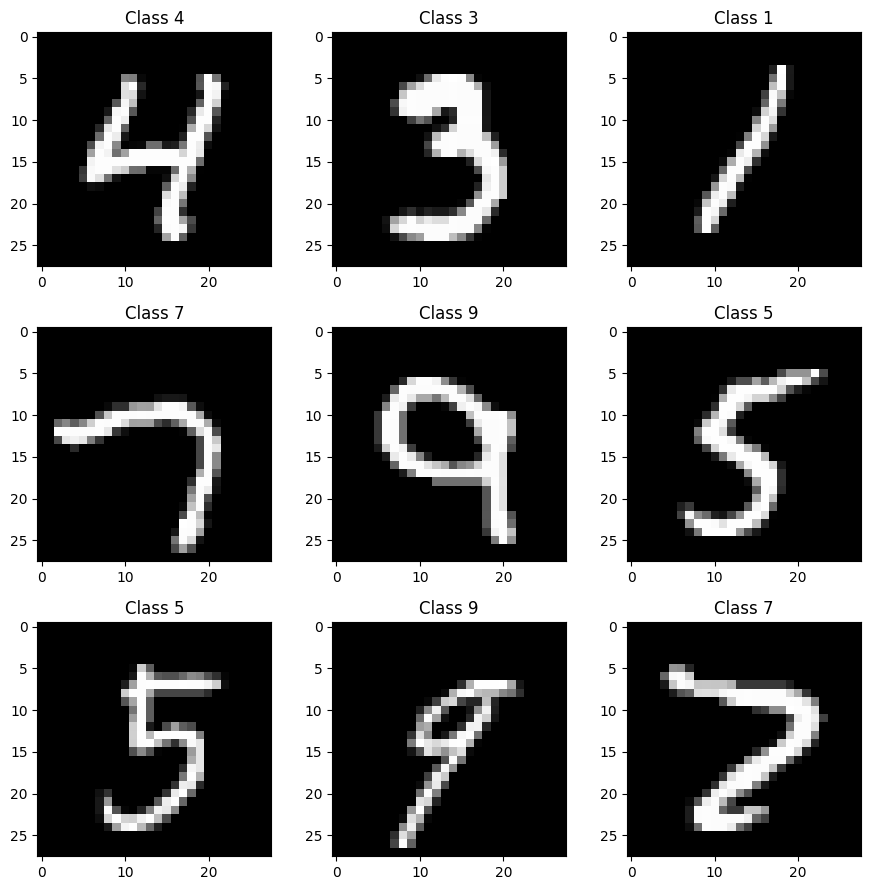

In [3]:
plt.rcParams['figure.figsize'] = (9,9) # Make the figures a bit bigger

for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))

plt.tight_layout()


Let's examine a single digit a little closer. Here is the array (a 28 x 28 **tensor**) representing the last digit.

In [4]:
# just a little function for pretty printing a matrix
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end=" ")
        print("")

# now print!
matprint(X_train[num])

0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0   0 147 143  38   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0 101 249 252 209   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  0 0 0 0 0 
0 0 0 0  25 199 252 246 197 198 197 197 181  57  57  57  57  57  57  32   0   0   0  0 0 0 0 0 
0 0 0 0   0  28  84  99 223 225 223 246 252 252 253 252 252 252 252 216 169  53   0  0 0 0 0 0 
0 0 0 0   0   0   0   0   0   0   0  88 205 252 253 252 252 252 252 253 252 227 126  0 0 0 0 0 
0 0 0 0   0   0   0   0   0   0   0   0 

Each pixel is an 8-bit integer from 0-255. 0 is full black, while 255 is full white.


## Formatting the input data layer

Instead of a 28 x 28 matrix, we rearrange the cells to create a 784-length vector. 28 x 28 = 784, so this doesn't change the number of cells. It just arranges them in a vector, rather than in an array.

You may think that this will create a mess. After all, in the array below the 1 in the upper left corner has another 1 to the right, and a 4 below it. However, as we build a neural network, we learn the relationships between all cells, regardless of position. If it is important that the 1 in the upper left corner somehow be connected to the cell to the right, and the cell below, the neural network will figure that out.  

We will also normalize the inputs to be in the range [0-1] rather than [0-255]. That just requires dividing each cell by 255. As we build this neural network, all of the cells in all tensors will have values from 0 to 1. That improves processing efficiency.

<img src='https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/flatten.png?raw=1' >

In [5]:
# We will first "flatten" the individual images, as pictured above
X_train = X_train.reshape(60000, 784) # reshape a 60,000 x 28 x 28 tensor into a 60,000 x 784 tensor.
X_test = X_test.reshape(10000, 784)   # reshape a 10,000 x 28 x 28 tensor into a 10,000 x 784 tensor.

# We will then divide every cell by 255, converting them to numbers from 0 to 1
X_train = X_train.astype('float32')/255   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')/255     # and divide by 255 to change to a 0 1 range

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


## Define the classifiers
We have pictures of the digits from 0 to 9. We know (from a human) which digit appears in each picture. That is the "class" of the picture (i.e., the "class" is a number from 0 to 9).

Our neural network will identify relationships among pixels that best map the pixels into the correct class. We first need to define the classes in a way that permits uncertainty in how well each picture conforms to each classe. That requires defining our classes like this.


- 0 -> [__1__, 0, 0, 0, 0, 0, 0, 0, 0, 0]
- 1 -> [0, __1__, 0, 0, 0, 0, 0, 0, 0, 0]
- 2 -> [0, 0, __1__, 0, 0, 0, 0, 0, 0, 0]
- 3 -> [0, 0, 0, __1__, 0, 0, 0, 0, 0, 0]
- 4 -> [0, 0, 0, 0, __1__, 0, 0, 0, 0, 0]
- 5 -> [0, 0, 0, 0, 0, __1__, 0, 0, 0, 0]
- 6 -> [0, 0, 0, 0, 0, 0, __1__, 0, 0, 0]
- 7 -> [0, 0, 0, 0, 0, 0, 0, __1__, 0, 0]
- 8 -> [0, 0, 0, 0, 0, 0, 0, 0, __1__, 0]
- 9 -> [0, 0, 0, 0, 0, 0, 0, 0, 0, __1__]
___

If the final output of our network is close to one of these classes, then it is most likely that class. For example, if the final output is:


- [0, __0.94__, 0, 0, 0, 0, __0.06__, 0, 0]

then this image is probably the digit __1__.

___

If the output is this:

- [0, __0.1__, 0, 0, 0, 0, 0, 0, __0.9__]

Then the image is probably the digit __9__.

___

If the output is this:

- [0, __0.60__, __0.40__, 0, 0, 0, 0, 0, 0]

Then the image is probably a __1__ (60% chance), but it could be a __2__ (40% chance).

___

If the output of the network is this:

- [0, __0.5__, 0, __0.5__, 0, 0, 0, 0, 0]

There is an equal chance that the image is a __1__ or a __3__. The image is ambiguous to the neural network, it could be either.

___

How about this?

- [__0.1__, __0.1__, __0.1__, __0.1__, __0.1__, __0.1__, __0.01__, __0.1__, __0.1__]

Each classification is equally probable, so the network has  __no idea__ what digit appears in the image.



In [6]:
classes = 10 # number of unique digits

Y_train = to_categorical(y_train, classes) # This converts the traning classifiers
Y_test = to_categorical(y_test, classes)   # This converts the test classifiers

##Let's look at our first y_test and Y_Test

In [7]:
print("This is the first y_test", y_test[1])
print("This is the first Y_test", Y_test[1])

This is the first y_test 2
This is the first Y_test [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


y_test[1] simply said the first image was a 2, a class assigned by a human reader.

Y_test[1] (with a capital Y) said it there was no chance the first image was a 0, 1, 3, 4, 5, 6, 7, 8, 9, and 100% chance it was a 2.

Training and applying a neural network requres that there be a probability of any classification, which is why we created Y_test from y_test.


# Building a 3-layer fully connected network (FCN)

<img src= "https://github.com/StevenLShafer/Neural-Networks-with-Keras/blob/main/StackedNN.png?raw=1">


In [8]:
# The Sequential model is a linear stack of layers and is very common.

model = Sequential() # This is the Keras command to start creating a sequential model

## The first hidden layer

In [9]:
# The first hidden layer is a set of 512 nodes (artificial neurons).
# Each node will receive an element from each input vector and apply some weight and bias to it.

model.add(Dense(512, input_shape=(784,))) #(784,) is not a typo -- that represents a 784 length vector!

In [10]:
# An "activation" is a non-linear function applied to the output of the layer above.
# It checks the new value of the node, and decides whether that "neuron" has fired.
# The Rectified Linear Unit (ReLU) converts all negative inputs to nodes in the next layer to be zero.
# Those inputs are then not considered to be fired.
# Positive values of a node are unchanged.

model.add(Activation('relu'))

$$f(x) = max (0,x)$$
<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/relu.jpg?raw=1">

In [11]:
# Dropout zeroes a selection of random outputs (i.e., disables their activation)
# Dropout helps protect the model from memorizing or "overfitting" the training data.
model.add(Dropout(0.2))

## Adding the second hidden layer

In [12]:
# The second hidden layer appears identical to our first layer.
# However, instead of each of the 512-node receiving 784-inputs from the input image data,
# they receive 512 inputs from the output of the first 512-node layer.

model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

## The Final Output Layer

In [13]:
# The final layer of 10 neurons in fully-connected to the previous 512-node layer.
# The final layer of a FCN should be equal to the number of desired classes (10 in this case).
model.add(Dense(10))

In [14]:
# The "softmax" activation represents a probability distribution over K different possible outcomes.
# Its values are all non-negative and sum to 1.

model.add(Activation('softmax'))

In [15]:
# Summarize the built model

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5

The first dense layer represents a mapping of **each** of the 784 cells (a single image) + 1 additional cell (an annotation) into an array of 512 elements. This dense layer has 512 cells. However, each of the 785 cells in the image has a unique parameter that maps it into the 512 cell dense layer. The neural network has to thus figure out 401920 parameters, which is the coefficient to go from the initial image to this dense layer.

The layer marked dense 1 is the second layer. The 512 cells in the first layer, plus an annotation layer, are mapped to 512 cells in the second layer. To create this map, the system will estimate an additional 262656 parameters (512 * 513).

The last layer is output layer. Each of the 512 cells in the dense 1 laywer, plus an annotation cell, is mapped into just ten cells, which are the probabilities of digits 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9, respectively. The system will estimate 5130 parameters to create this map.

The net result is that the system will estimate 669706 parameters. These parameters provide a path from the original MNIST image to the probabilities of each digit.

The second dense layer

## Compiling the model
When compiing a model you need to specify a **loss function** and an **optimizer**. The loss function we'll use here is called *categorical cross-entropy*. This loss function is well-suited to comparing two probability distributions.

Our predictions areb based on the predictions of the probability of each digits (e.g. "we're 80% confident this image is a 3, 10% sure it's an 8, 5% it's a 2, etc.").

The cross-entropy function is a measure of how different your predicted distribution is from the target distribution. [More detail at Wikipedia](https://en.wikipedia.org/wiki/Cross_entropy)

All forms of iterative estimation involve minimizing the error between measured and predicted values. In meachine learning this is called the "optimizer." The optimizer helps determine how quickly the model learns through **gradient descent**. The rate at which descends a gradient is called the **learning rate**.

In 2014 a new method was proposed called **Adaptive Moment Estimation**, usually just called **ADAM**. This has become particularly popular for estimating the parameters in neural networks, and will be used in this example.

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/gradient_descent.png?raw=1" >

<img src = "https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/learning_rate.png?raw=1" >

So are smaller learning rates better? Not quite! It's important for an optimizer not to get stuck in local minima while neglecting the global minimum of the loss function. Sometimes that means trying a larger learning rate to jump out of a local minimum.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/complicated_loss_function.png?raw=1' >

In [16]:
# Let's use the Adam optimizer for learning
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

## Train the model!
This is the fun part!

The batch size determines over how much data per step is used to compute the loss function, gradients, and back propagation. Large batch sizes allow the network to complete it's training faster; however, there are other factors beyond training speed to consider.

Too large of a batch size smoothes the local minima of the loss function, causing the optimizer to settle in one because it thinks it found the global minimum.

Too small of a batch size creates a very noisy loss function, and the optimizer may never find the global minimum.

So a good batch size may take some trial and error to find!

In [17]:
model.fit(
    X_train, # The images
    Y_train, # The classifiers (0 through 9, each as the probablities as shown above)
    batch_size=128,
    epochs=5,
    verbose=1
    )

Epoch 1/5
469/469 [==============================] - 5s 4ms/step - loss: 0.2503 - accuracy: 0.9242
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0980 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0710 - accuracy: 0.9773
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0551 - accuracy: 0.9827
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0448 - accuracy: 0.9856


The two numbers, in order, represent the value of the loss function of the network on the training set, and the overall accuracy of the network on the training data. But how does it do on data it did not train on?

## Evaluate Model's Accuracy on Test Data

In [20]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.0648 - accuracy: 0.9817
Test score: 0.06478189677000046
Test accuracy: 0.9817000031471252


### Inspecting the output

It's always a good idea to inspect the output and make sure everything looks sane. Here we'll look at some examples it gets right, and some examples it gets wrong.

In [21]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis = 1) #,axis=1)model.predict_classes(X_test)

# Check which items we got right / wrong
correct_indices = np.nonzero(predicted_classes == y_test)[0]

incorrect_indices = np.nonzero(predicted_classes != y_test)[0]


313/313 [==============================] - 1s 2ms/step


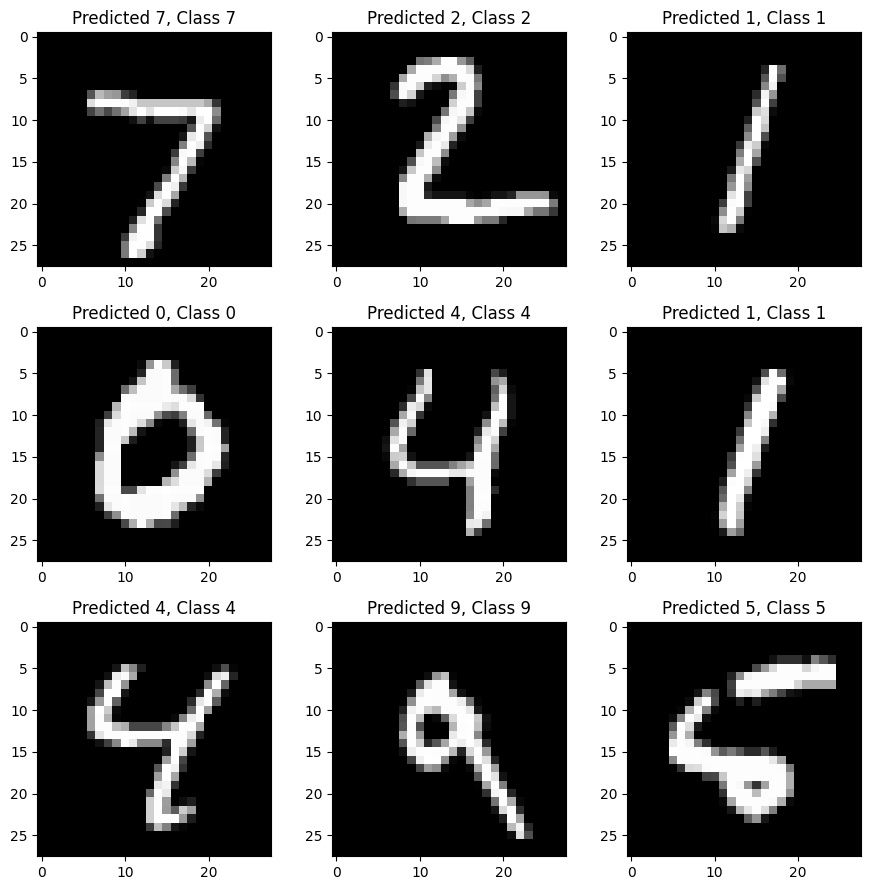

In [22]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))

plt.tight_layout()



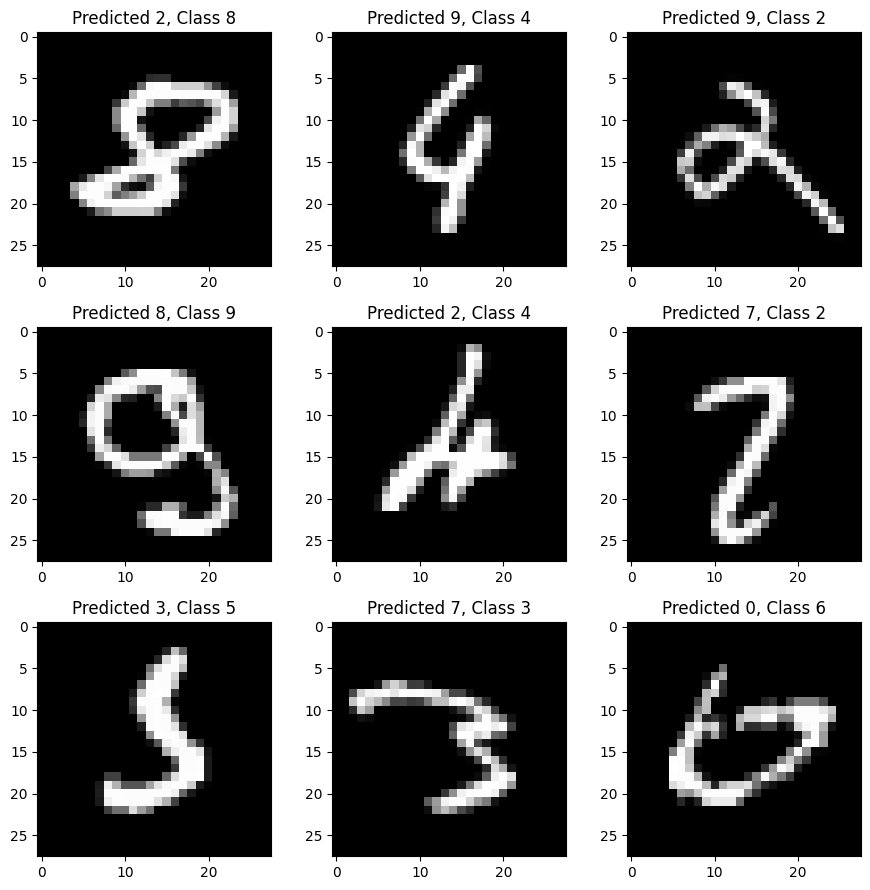

In [23]:
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

Text(0.5, 1.0, 'Last hidden layer representation')

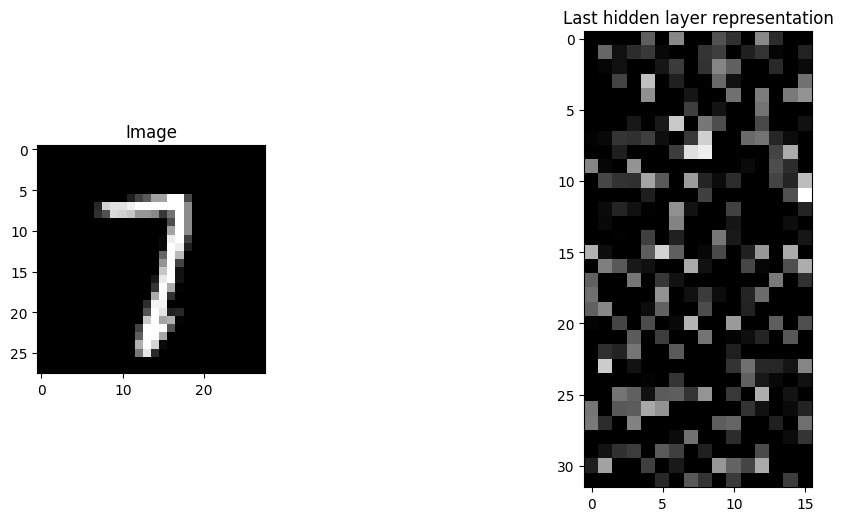

In [24]:
from keras import backend as K
get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[5].output])
nb = 234
img = [X_test[nb,].reshape(1,784)]
layer_output = get_layer_output(img)[0]
plt.rcParams['figure.figsize'] = (10,10)
plt.subplot(1,3,1)
plt.imshow(X_test[nb,].reshape(28,28), cmap='gray', interpolation='none')
plt.title("Image")
plt.subplot(1,3,3)
plt.imshow(layer_output.reshape(32,16), cmap='gray', interpolation='none')
plt.title("Last hidden layer representation")

# Introducing Convolution! What is it?

Before, we built a network that accepts the normalized pixel values of each value and operates soley on those values. What if we could instead feed different features (e.g. **curvature, edges**) of each image into a network, and have the network learn which features are important for classifying an image?

This possible through convolution! Convolution applies **kernels** (filters) that traverse through each image and generate **feature maps**.

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/convolution.gif?raw=1' >

In the above example, the image is a 5 x 5 matrix and the kernel going over it is a 3 x 3 matrix. A dot product operation takes place between the image and the kernel and the convolved feature is generated. Each kernel in a CNN learns a different characteristic of an image.



Kernels in deep learning networks are used in similar ways, i.e. highlighting some feature. Combined with a system called **max pooling**, the non-highlighted elements are discarded from each feature map, leaving only the features of interest, reducing the number of learned parameters, and decreasing the computational cost (e.g. system memory).

<img src = 'https://github.com/AviatorMoser/keras-mnist-tutorial/blob/master/max_pooling.png?raw=1' >

We can also take convolutions of convolutions -- we can stack as many convolutions as we want, as long as there are enough pixels to fit a kernel.

*Warning: What you may find down there in those deep convolutions may not appear recognizable to you.*

## Building a "Deep" Convolutional Neural Network

In [25]:
# import some additional tools

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers import BatchNormalization

In [26]:
# Reload the MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [27]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train = X_train.reshape(60000, 28, 28, 1) #add an additional dimension to represent the single-channel
X_test = X_test.reshape(10000, 28, 28, 1)

X_train = X_train.astype('float32')         # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 28, 28, 1)
Testing matrix shape (10000, 28, 28, 1)


In [28]:
# convert to 10 categorical classes (as before)

nb_classes = 10 # number of unique digits

Y_train = to_categorical(y_train, nb_classes)
Y_test = to_categorical(y_test, nb_classes)

In [29]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(28,28,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)

# Convolution Layer 2
model.add(Conv2D(32, (3, 3)))                        # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer02 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer02)

# Convolution Layer 3
model.add(Conv2D(64,(3, 3)))                         # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer03 = Activation('relu')                     # activation
model.add(convLayer03)

# Convolution Layer 4
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                                 # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 5
model.add(Dense(512))                                # 512 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))                        # activation

# Fully Connected Layer 6
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))                     # softmax activation

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 26, 26, 32)        128       
 Normalization)                                                  
                                                                 
 activation_3 (Activation)   (None, 26, 26, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 24, 24, 32)        128       
 chNormalization)                                                
                                                                 
 activation_4 (Activation)   (None, 24, 24, 32)       

In [31]:
# we'll use the same optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
# data augmentation prevents overfitting by slightly changing the data randomly
# Keras has a great built-in feature to do automatic augmentation

gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [34]:
# We can then feed our augmented data in batches
# Besides loss function considerations as before, this method actually results in significant memory savings
# because we are actually LOADING the data into the network in batches before processing each batch

# Before the data was all loaded into memory, but then processed in batches.

train_generator = gen.flow(X_train, Y_train, batch_size=128)
test_generator = test_gen.flow(X_test, Y_test, batch_size=128)

In [42]:
# We can now train our model which is fed data by our batch loader
# Steps per epoch should always be total size of the set divided by the batch size

# SIGNIFICANT MEMORY SAVINGS (important for larger, deeper networks)

#model.fit_generator(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
#                    validation_data=test_generator, validation_steps=10000//128)
model.fit(train_generator, steps_per_epoch=60000//128, epochs=5, verbose=1,
         validation_data=test_generator, validation_steps=10000//128)

Epoch 1/5
468/468 [==============================] - 22s 48ms/step - loss: 0.0213 - accuracy: 0.9930 - val_loss: 0.0306 - val_accuracy: 0.9905
Epoch 2/5
468/468 [==============================] - 22s 48ms/step - loss: 0.0206 - accuracy: 0.9934 - val_loss: 0.0183 - val_accuracy: 0.9945
Epoch 3/5
468/468 [==============================] - 22s 48ms/step - loss: 0.0201 - accuracy: 0.9938 - val_loss: 0.0185 - val_accuracy: 0.9950
Epoch 4/5
468/468 [==============================] - 21s 45ms/step - loss: 0.0190 - accuracy: 0.9940 - val_loss: 0.0239 - val_accuracy: 0.9928
Epoch 5/5
468/468 [==============================] - 22s 48ms/step - loss: 0.0170 - accuracy: 0.9947 - val_loss: 0.0221 - val_accuracy: 0.9932


Notice how the accuracy did not improve much after the second run ("epoch"). That shows that the convolution neural network on the first pass, epoch 1, did about as well as possible with this approach. Nothing was learned on subsequent epochs.

In [43]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 5ms/step - loss: 0.0220 - accuracy: 0.9932
Test score: 0.02202834002673626
Test accuracy: 0.9932000041007996


An accuracy of 0.9932 means that out of 10,000 validation images, only 68 were incorrectly recognized.

313/313 [==============================] - 1s 3ms/step


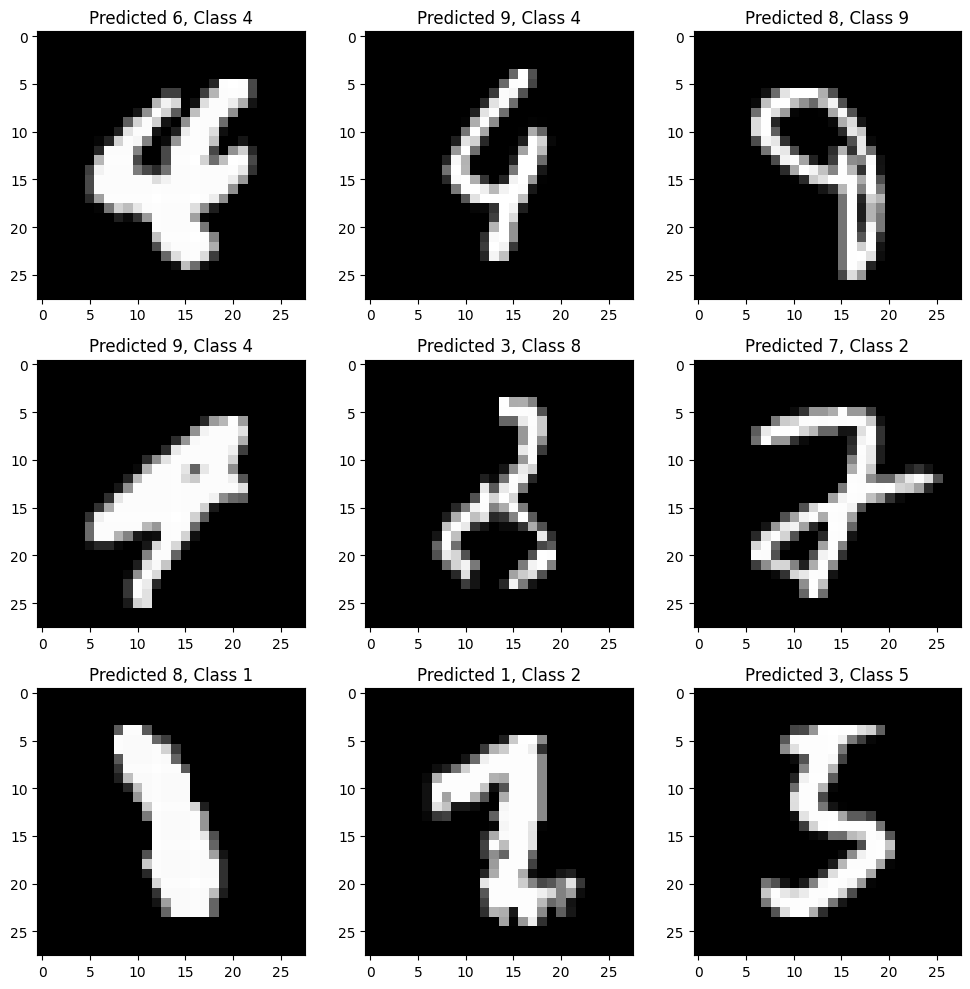

In [44]:
predicted_classes = np.argmax(model.predict(X_test), axis = 1) #,axis=1)model.predict_classes(X_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

plt.tight_layout()

## Great results!

In the few places where the neural network misread the image, it isn't clear that a human would have done any better.

# Additional Training

For more training and MANY MANY EXAMPLES of Neural Networks visit

#https://keras.io/
